In [37]:
from scipy.io import loadmat
import os
import pandas as pd
import numpy as np


In [42]:
def load_all_mat(dir_name, n):
    mat_files = []
    for root, dirs, files in os.walk(dir_name):
        for file in files:
            if file.endswith('.mat'):
                mat_files.append(loadmat(dir_name + file))
        break
    data = [[mat['ECG'][0][0][0][0], mat['ECG'][0][0][1][0][0], np.array(mat['ECG'][0][0][2][:, :n])] for mat in mat_files]
    return pd.DataFrame(data, columns=['Sex', 'Age', 'Data'])

In [49]:
minimum = 50000
for i in range(len(data)):
    minimum = min(minimum, data.iloc[i, 2].shape[1])
minimum

4500

In [51]:
data = load_all_mat('./TrainingSet1/', minimum)
data

,Sex,Age,Data
0,Male,74.0,"[[0.028228800000000002, 0.0392288, 0.0452288, ..."
1,Female,49.0,"[[-0.000517519704822451, -0.004339990711138351..."
2,Female,81.0,"[[0.04265599011524819, 0.015651127559649054, -..."
3,Male,45.0,"[[-0.04476274954533943, -0.010320629381248926,..."
4,Male,53.0,"[[0.02699552, 0.02799552, 0.02499552, 0.018995..."
...,...,...,...
1995,Female,48.0,"[[-0.2685169798778389, -0.37086560996359136, -..."
1996,Female,67.0,"[[-0.08090275726816766, -0.12091129015858207, ..."
1997,Male,66.0,"[[-0.14810625, -0.14510625, -0.132106249999999..."
1998,Male,66.0,"[[-0.027058782688117483, -0.034560115482108966..."


In [57]:
data.iloc[0,2].shape

(12, 4500)

In [92]:
data.columns

Index(['Sex', 'Age', 'Data'], dtype='object')

In [58]:
import matplotlib.pyplot as plt

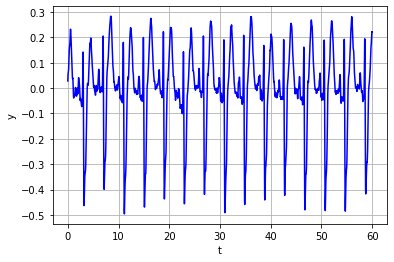

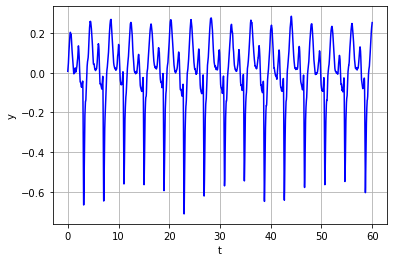

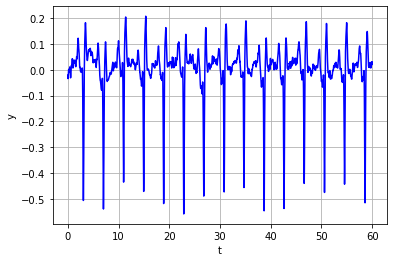

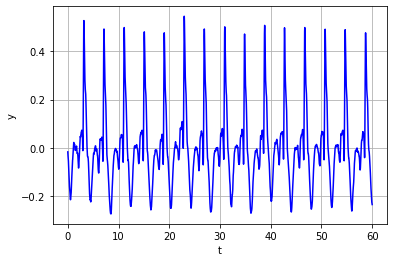

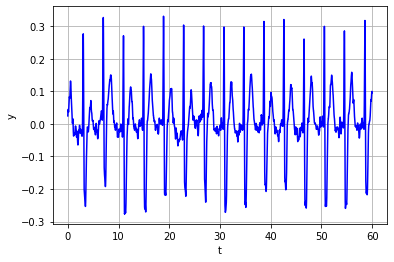

In [61]:
for i in range(5):
    plt.plot(np.linspace(0, 60, n), data.iloc[0,2][i],'b')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.grid()
    plt.show()
    

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     2000 non-null   object 
 1   Age     1997 non-null   float64
 2   Data    2000 non-null   object 
dtypes: float64(1), object(2)
memory usage: 47.0+ KB


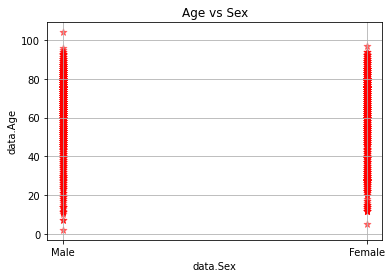

In [94]:
plt.grid()
plt.scatter(data.Sex, data.Age, alpha=0.5, c='r', s=50, marker='*')
plt.xlabel('data.Sex')
plt.ylabel('data.Age')
plt.title('Age vs Sex')
pass

In [104]:
data.describe()

,Age
count,1997.000000
mean,60.782173
std,19.121543
min,2.000000
25%,49.000000
50%,64.000000
75%,76.000000
max,104.000000


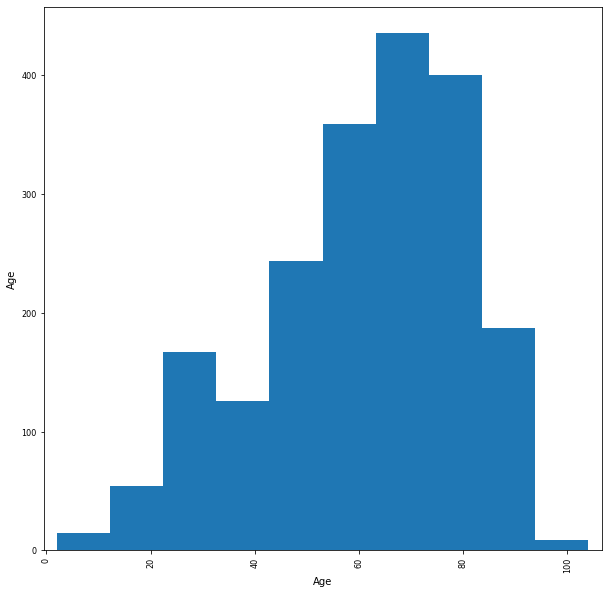

In [119]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[:][:], alpha = 1, figsize = (10, 10))
pass

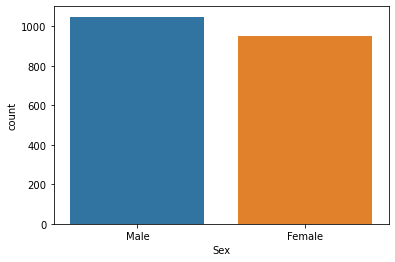

In [122]:
import seaborn as sns
sns.countplot(x='Sex', data=data)
pass

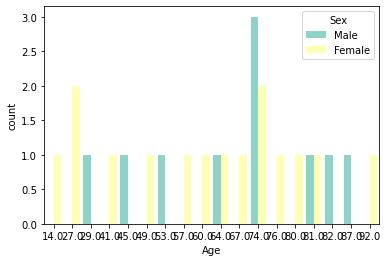

In [139]:
sns.countplot(x='Age', data=data[:][:25], saturation=5, hue = 'Sex', palette = 'Set3')
pass